## Step 1: Load and Visualize Data

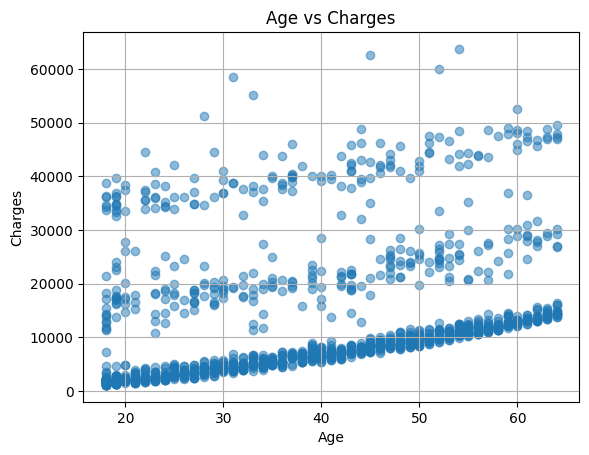

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("data/insurance.csv")
X = df['age'].values
y = df['charges'].values


plt.scatter(X, y, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.grid(True)
plt.show()

In [2]:
# Manual normalization
X_mean = np.mean(X)
X_std = np.std(X)
X_norm = (X - X_mean) / X_std

y_mean = np.mean(y)
y_std = np.std(y)
y_norm = (y - y_mean) / y_std

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
print(len(X_norm))

1338


## Step 2: Define Cost Function (MSE)

In [5]:
import numpy as np

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def predict(X_norm, w, b):
    return w * X_norm + b

w, b = 0, 0
y_pred = predict(X_norm, w, b)
mse = compute_mse(y, y_pred)
print(f"MSE with w=0 and b=0: {mse}")

MSE with w=0 and b=0: 322646873.5887047


## Step 3: Gradient Descent Function

### 🧮 Mean Squared Error (MSE)

The objective of linear regression is to minimize the **Mean Squared Error (MSE)** between the true values and the predicted values:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - (w x_i + b))^2
$$

---

### 🎯 Goal

Minimize the MSE by computing the partial derivatives of the loss function with respect to **w** and **b**.

---

### ✏️ Gradient Derivation

**1. Gradient with respect to** $w$:

$$
\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum (x_i \cdot (y_i - \hat{y}_i)) = -\frac{2}{n} X^T(y - \hat{y})
$$

**2. Gradient with respect to** $b$:

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum (y_i - \hat{y}_i)
$$

---

### 🌀 Intuition

- These gradients point in the direction of **steepest increase** in loss.  
- To minimize the loss, we **subtract** them during parameter update (i.e., gradient descent).
- Hence:

```python
w -= lr * dw
b -= lr * db


In [6]:
def gradient_descent(X_norm, y, lr=0.01, epochs=1000):
    n = len(X_norm)
    w, b = 0.0, 0.0
    loss_history = []

    for epoch in range(epochs):
        y_pred = w * X_norm + b
        error = y - y_pred
        mse = np.mean(error ** 2)
        loss_history.append(mse)

        dw = -(2/n) * np.dot(X_norm, error)
        db = -(2/n) * np.sum(error)

        w -= lr * dw
        b -= lr * db

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: MSE = {mse:.2f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, loss_history

w_final, b_final, losses = gradient_descent(X_norm, y)
print(f"Final slope: {w_final}, Final intercept: {b_final}")

Epoch 0: MSE = 322646873.59, w = 72.3928, b = 265.4084
Epoch 100: MSE = 136768721.79, w = 3149.2049, b = 11545.7031
Epoch 200: MSE = 133499506.78, w = 3557.2504, b = 13041.6908
Epoch 300: MSE = 133442008.00, w = 3611.3652, b = 13240.0880
Epoch 400: MSE = 133440996.72, w = 3618.5419, b = 13266.3993
Epoch 500: MSE = 133440978.93, w = 3619.4937, b = 13269.8887
Epoch 600: MSE = 133440978.62, w = 3619.6199, b = 13270.3515
Epoch 700: MSE = 133440978.61, w = 3619.6366, b = 13270.4129
Epoch 800: MSE = 133440978.61, w = 3619.6389, b = 13270.4210
Epoch 900: MSE = 133440978.61, w = 3619.6391, b = 13270.4221
Final slope: 3619.639185842242, Final intercept: 13270.422242807568


In [7]:
# Convert to original scale
w_orig = w_final / X_std
b_orig = b_final - (w_final * X_mean / X_std)
print(f"Original slope: {w_orig}")
print(f"Original intercept: {b_orig}")

Original slope: 257.72261823315677
Original intercept: 3165.8850007349447


## Step 4a: Plot Regression Line (With Normalization)

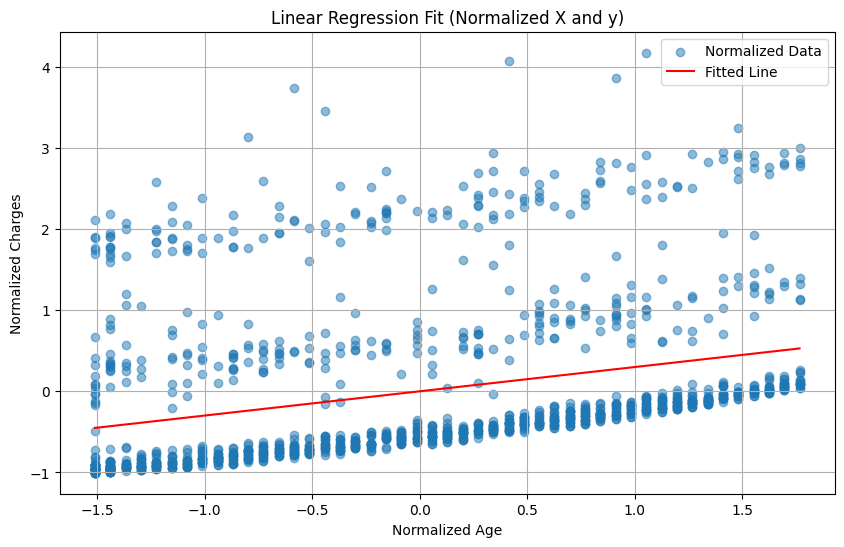

In [8]:
# Normalize y BEFORE training
y_mean = np.mean(y)
y_std = np.std(y)
y_norm = (y - y_mean) / y_std

# Re-train using normalized y
w, b = 0.0, 0.0
lr = 0.01
epochs = 1000
n = len(X_norm)

for epoch in range(epochs):
    y_pred = w * X_norm + b
    error = y_norm - y_pred
    dw = (-2/n) * np.dot(X_norm, error)
    db = (-2/n) * np.sum(error)
    w -= lr * dw
    b -= lr * db

# Predict using normalized w and b
y_pred_norm = w * X_norm + b

# Plot X_norm vs y_norm
sorted_idx = np.argsort(X_norm)
plt.figure(figsize=(10, 6))
plt.scatter(X_norm, y_norm, alpha=0.5, label='Normalized Data')
plt.plot(X_norm[sorted_idx], y_pred_norm[sorted_idx], color='red', label='Fitted Line')
plt.xlabel("Normalized Age")
plt.ylabel("Normalized Charges")
plt.title("Linear Regression Fit (Normalized X and y)")
plt.legend()
plt.grid(True)
plt.show()


## Step 4b: Plot Regression Line (Normalize)

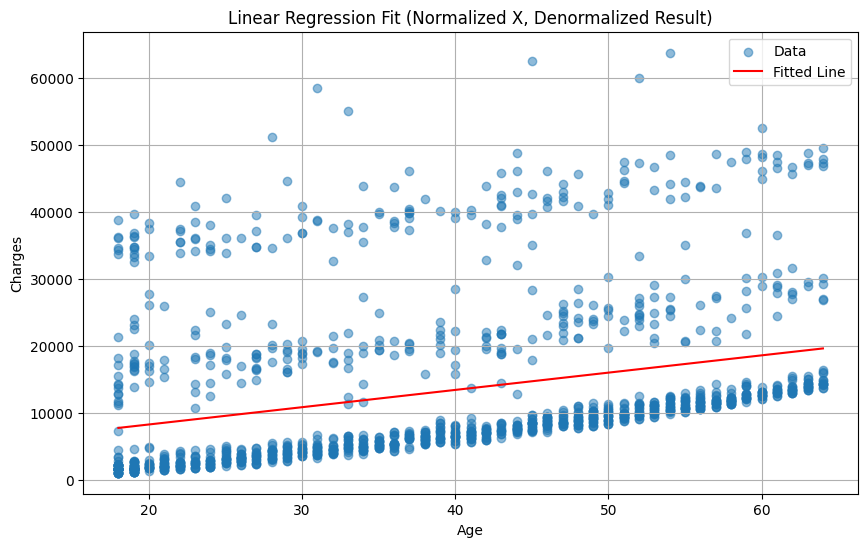

In [9]:
# Predict using original X
y_pred_final = w_orig * X + b_orig

# Sort for smoother line plot
sorted_idx = np.argsort(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data', alpha=0.5)
plt.plot(X[sorted_idx], y_pred_final[sorted_idx], color='red', label='Fitted Line')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Linear Regression Fit (Normalized X, Denormalized Result)')
plt.legend()
plt.grid(True)
plt.show()

## Step 5: Visualize Gradient Descent Curve (MSE vs Weight)

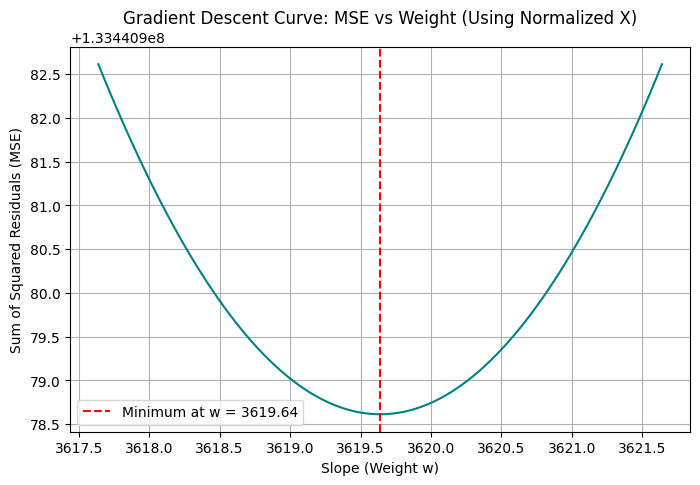

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Try different slopes in normalized domain
w_range = np.linspace(w_final - 2, w_final + 2, 100)
b_fixed = b_final  # from training with normalized X

# Use normalized X to stay consistent
loss_curve = [compute_mse(y, w * X_norm + b_fixed) for w in w_range]

# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(w_range, loss_curve, color='teal')
plt.xlabel('Slope (Weight w)')
plt.ylabel('Sum of Squared Residuals (MSE)')
plt.title('Gradient Descent Curve: MSE vs Weight (Using Normalized X)')
plt.axvline(w_final, color='red', linestyle='--', label=f'Minimum at w = {w_final:.2f}')
plt.legend()
plt.grid(True)
plt.show()